Shape of X: (569, 30)
Shape of y: (569,)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wors

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.5808 - loss: 0.8644 - precision: 0.6353 - val_accuracy: 0.5385 - val_loss: 0.7409 - val_precision: 0.5696
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6535 - loss: 0.6988 - precision: 0.6675 - val_accuracy: 0.7033 - val_loss: 0.6081 - val_precision: 0.6970
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7396 - loss: 0.5891 - precision: 0.7362 - val_accuracy: 0.7912 - val_loss: 0.5282 - val_precision: 0.7931
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8104 - loss: 0.4968 - precision: 0.8226 - val_accuracy: 0.8352 - val_loss: 0.4724 - val_precision: 0.8519
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8439 - loss: 0.4825 - precision: 0.8398 - val_accuracy: 0.8462 - val_loss: 0.4241 - val_precision: 0.8679
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8834 - loss: 0.4027 - precision: 0.8787 - val_accuracy: 0.8791 - val_loss: 0.3859 

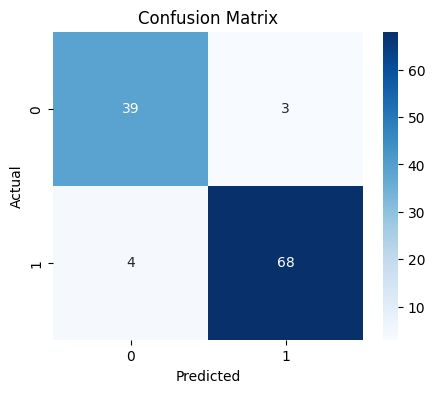

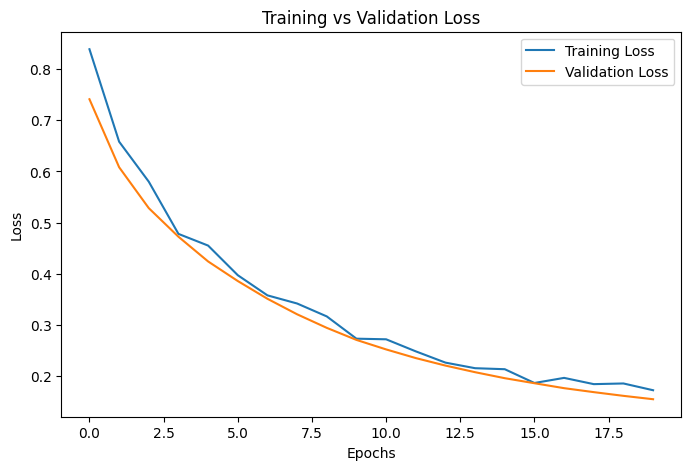

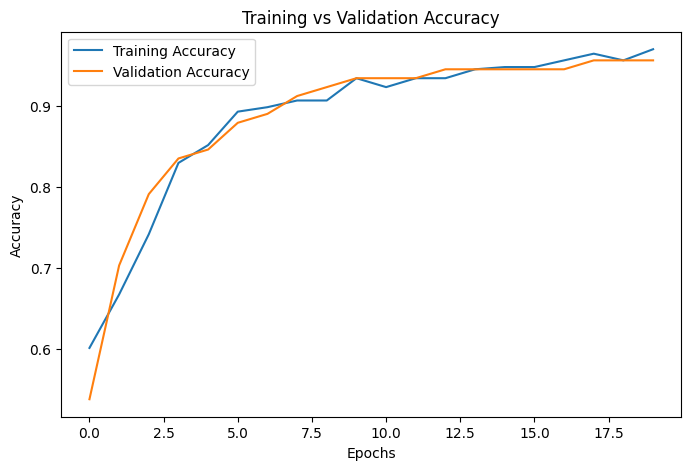


MODEL ANALYSIS:
Model is performing WELL


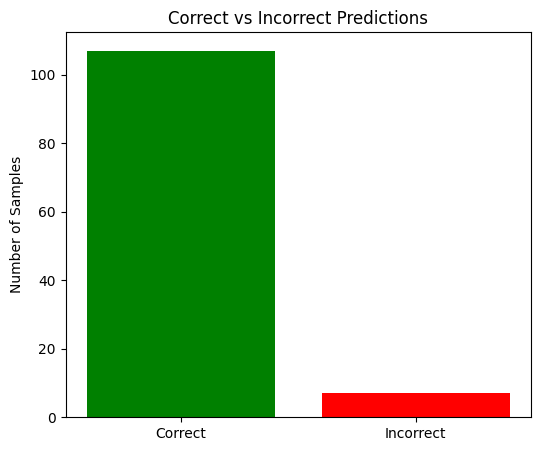

In [1]:
# ============================================================
# DATA SCIENCE LAB EXAM – VARIANT 2
# ADVANCED ANN CLASSIFICATION - BREAST CANCER DATASET
# ============================================================

# -------------------------
# IMPORT REQUIRED LIBRARIES
# -------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


# ============================================================
# a) DATA LOADING & EXPLORATION
# ============================================================

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Display shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 3. Convert to DataFrame
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print("\nFirst 5 rows:")
print(df.head())

print("\nSummary statistics:")
print(df.describe())

# 4. Class distribution
print("\nClass distribution:")
print(df['target'].value_counts())
print("\nDataset is BALANCED" if df['target'].value_counts(normalize=True).min() > 0.40 else "\nDataset is IMBALANCED")


# ============================================================
# b) PREPROCESSING & STRATIFIED SPLIT
# ============================================================

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified 80/20 split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in sss.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]


# ============================================================
# c) BUILD ADVANCED ANN MODEL
# ============================================================

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.Precision(name="precision")]
)

print("\nMODEL SUMMARY:")
model.summary()


# ============================================================
# d) MODEL TRAINING AND EVALUATION
# ============================================================

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Test metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print("\nTest Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# -------------------------
# TRAINING CURVE PLOTS
# -------------------------

# LOSS CURVE
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ACCURACY CURVE
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Model Behavior Analysis
print("\nMODEL ANALYSIS:")
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

if abs(train_acc - val_acc) > 0.15:
    print("Model is OVERFITTING")
elif train_acc < 0.80:
    print("Model is UNDERFITTING")
else:
    print("Model is performing WELL")


# ============================================================
# e) BAR CHART OF CORRECT vs INCORRECT PREDICTIONS
# ============================================================

correct = np.sum(y_test == y_pred.flatten())
incorrect = np.sum(y_test != y_pred.flatten())

plt.figure(figsize=(6,5))
plt.bar(["Correct", "Incorrect"], [correct, incorrect], color=["green", "red"])
plt.title("Correct vs Incorrect Predictions")
plt.ylabel("Number of Samples")
plt.show()
